In [3]:
import pandas as pd 
import numpy as np 

In [4]:
import os

# Path to the folder containing the CSVs
folder_path = 'stock_data'

# Dictionary to hold DataFrames for each stock
stock_data = {}

# Loop through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Full path of the file
        file_path = os.path.join(folder_path, filename)
        
        # Read the CSV into a DataFrame
        stock_name = filename.replace('.csv', '')  # Extract stock name (without .csv)
        df = pd.read_csv(file_path)
        
        # Store the DataFrame in the dictionary
        stock_data[stock_name] = df
        
        # Optional: print the first few rows of the DataFrame
        print(f"Loaded {stock_name}:")
        print(df.head(10))
        print("\n")



Loaded ASIANPAINT:
    timestamp       open       high        low      close  volume
0  2025-05-07  2370.7500  2405.0000  2319.0500  2332.6499   49937
1  2025-05-06  2440.1001  2446.9500  2390.5000  2417.9500   44538
2  2025-05-05  2421.4500  2474.5000  2421.4500  2437.3000   23800
3  2025-05-02  2420.6499  2445.1499  2398.2500  2409.4500   71905
4  2025-04-30  2440.5500  2461.4500  2401.0000  2423.3000   55057
5  2025-04-29  2455.5000  2471.8000  2439.3501  2452.0000   57466
6  2025-04-28  2411.2000  2459.6001  2406.0000  2452.5500   24180
7  2025-04-25  2460.1001  2469.3999  2413.5000  2430.2000   82859
8  2025-04-24  2441.1499  2490.7000  2436.2000  2464.6001   38991
9  2025-04-23  2434.4500  2455.9500  2426.6001  2453.0000   54412


Loaded BHARTIARTL:
    timestamp     open     high     low    close  volume
0  2025-05-07  1900.00  1916.90  1875.0  1895.95  119949
1  2025-05-06  1881.00  1912.00  1881.0  1901.15  225743
2  2025-05-05  1860.35  1873.35  1849.4  1865.45  124797
3  202

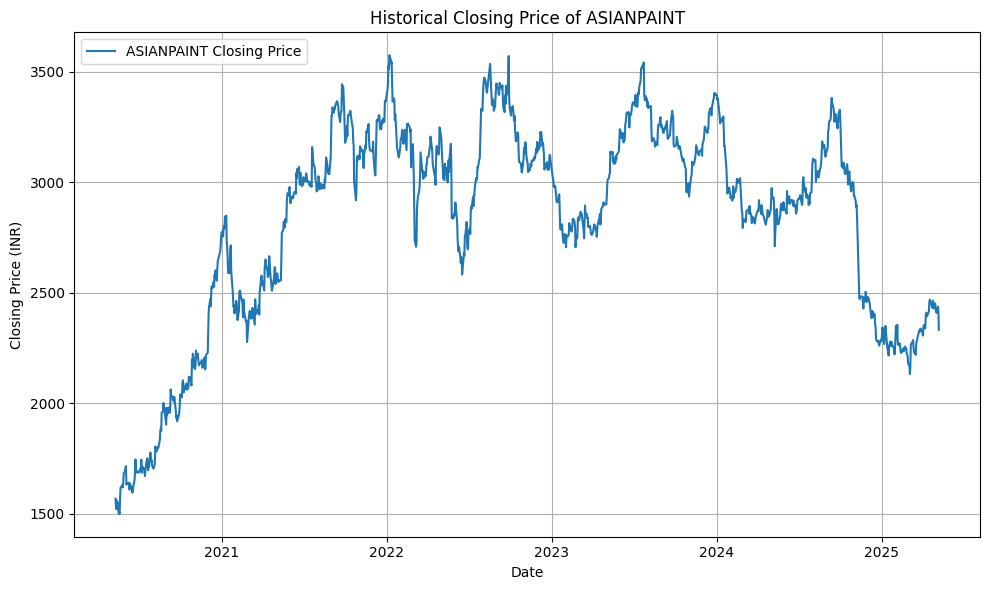

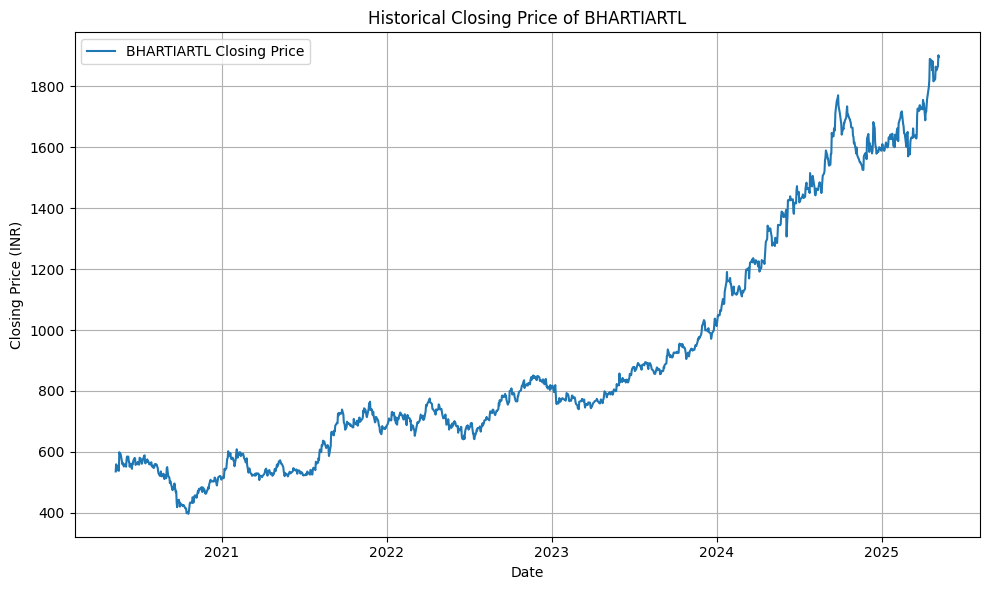

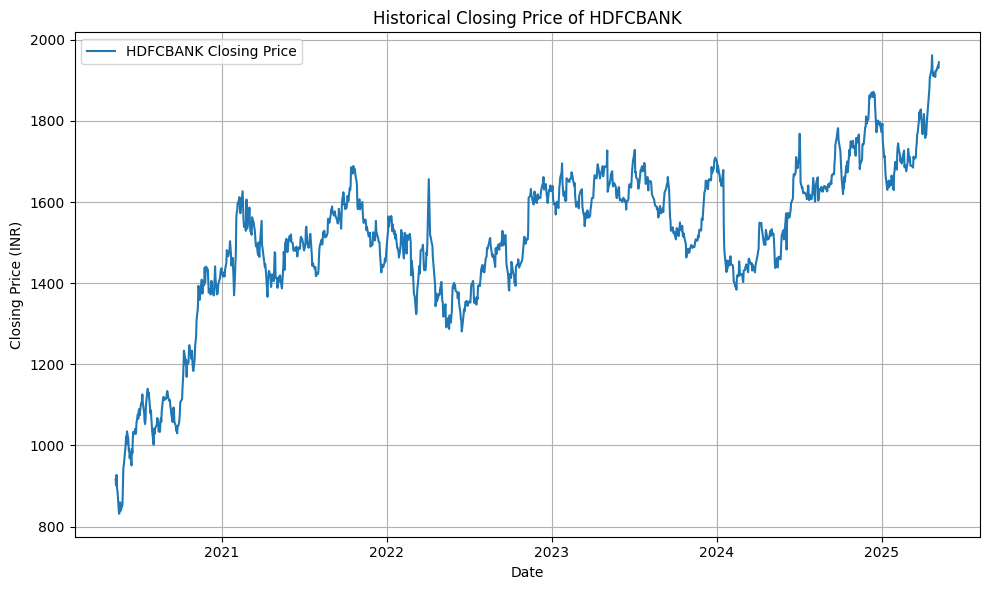

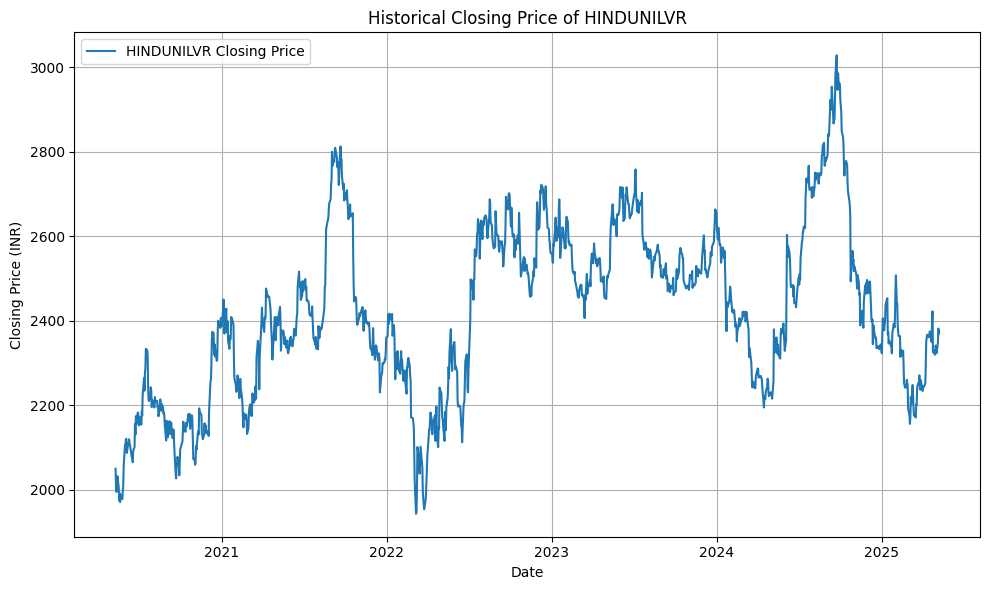

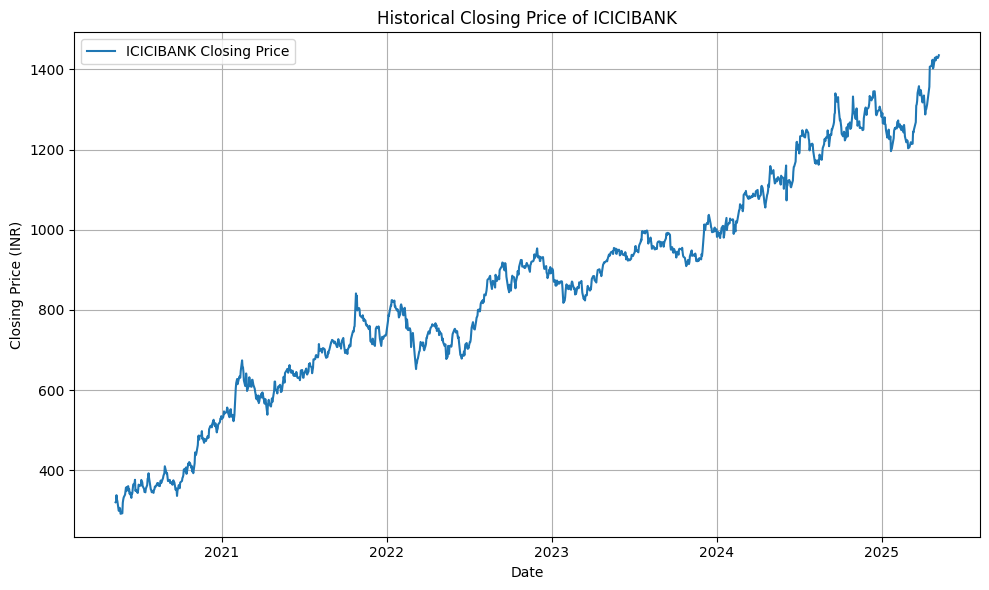

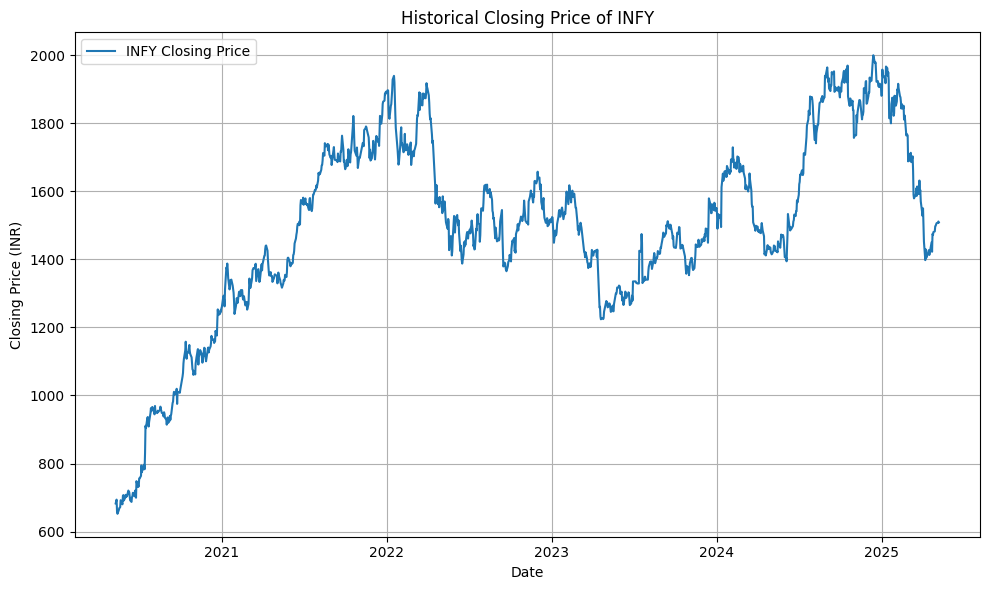

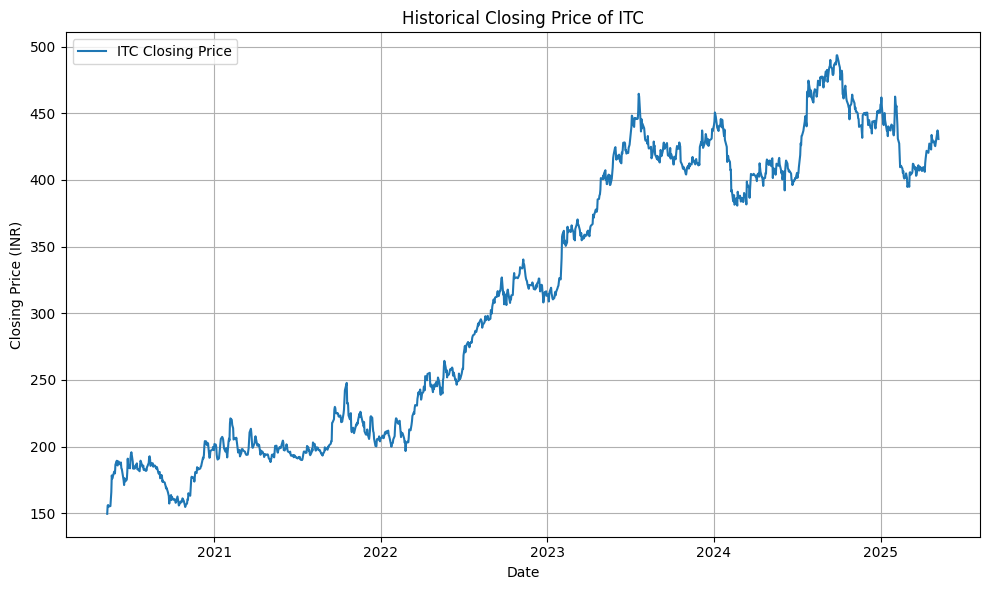

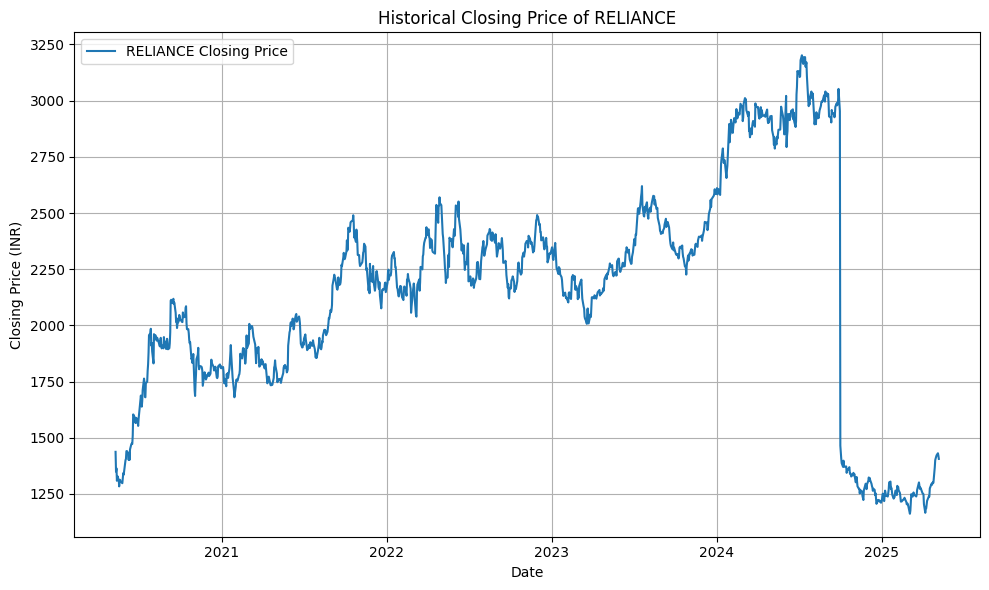

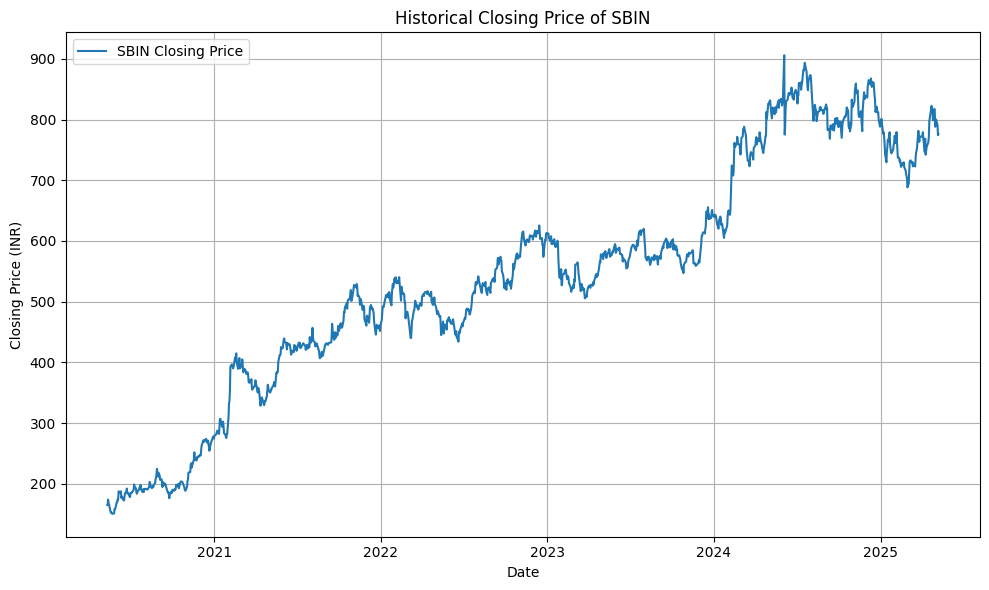

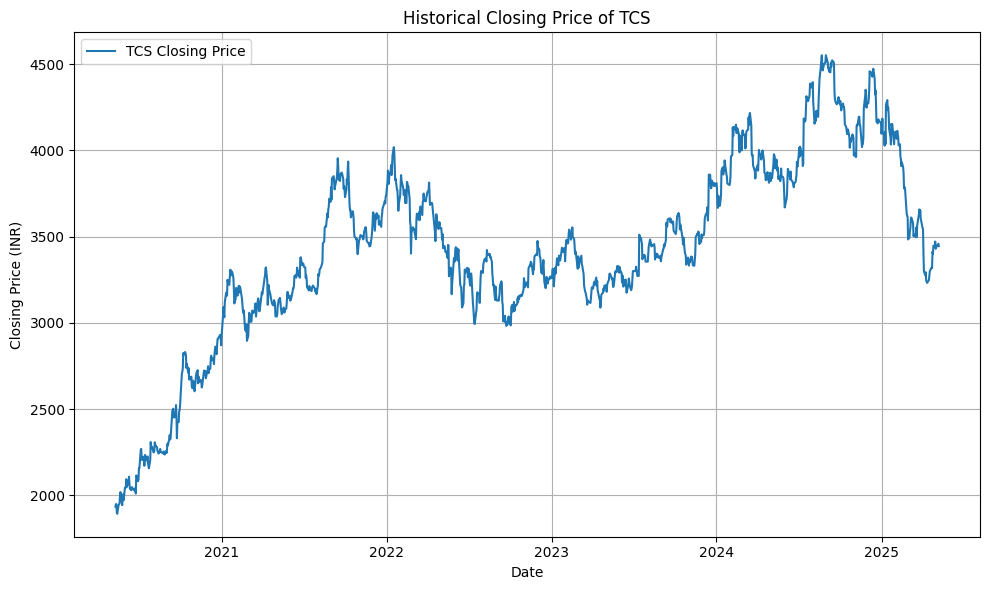

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Path to your stock CSVs
folder_path = 'stock_data'

# Load all CSVs into a dictionary
stock_data = {}
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        stock_name = filename.replace('.csv', '')
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, parse_dates=['timestamp'])  # Ensure timestamp is parsed
        df.sort_values('timestamp', inplace=True)  # Ensure chronological order
        stock_data[stock_name] = df

# Plot each stock's closing price
for stock_name, df in stock_data.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df['timestamp'], df['close'], label=f'{stock_name} Closing Price', linewidth=1.5)
    plt.title(f'Historical Closing Price of {stock_name}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (INR)')
    plt.grid(True)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

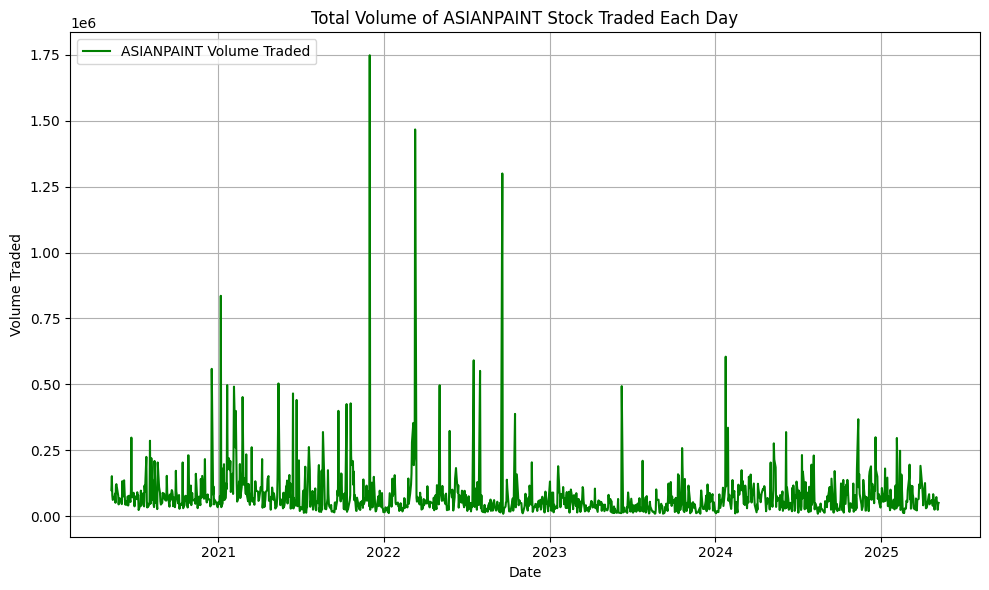

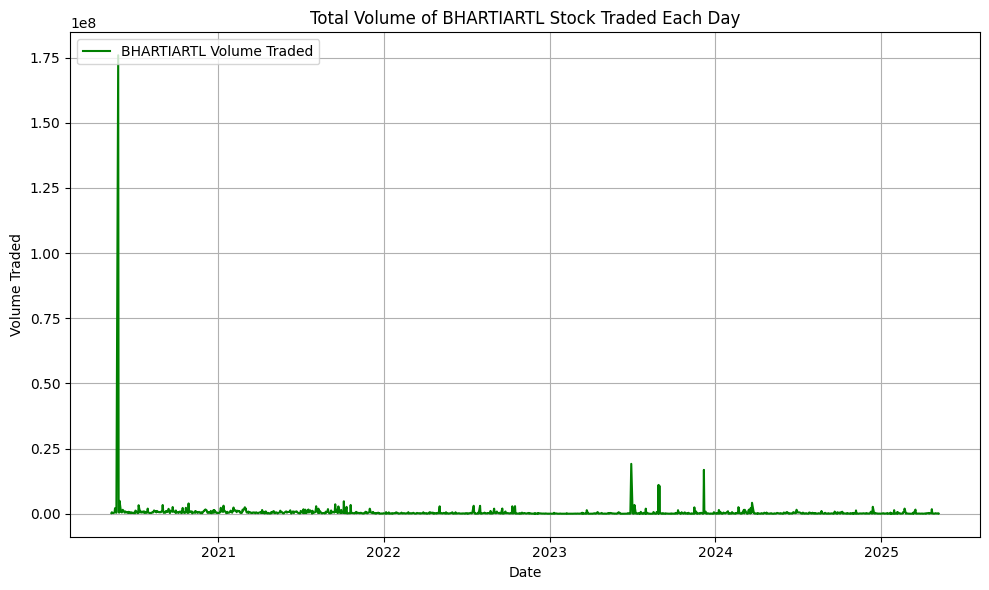

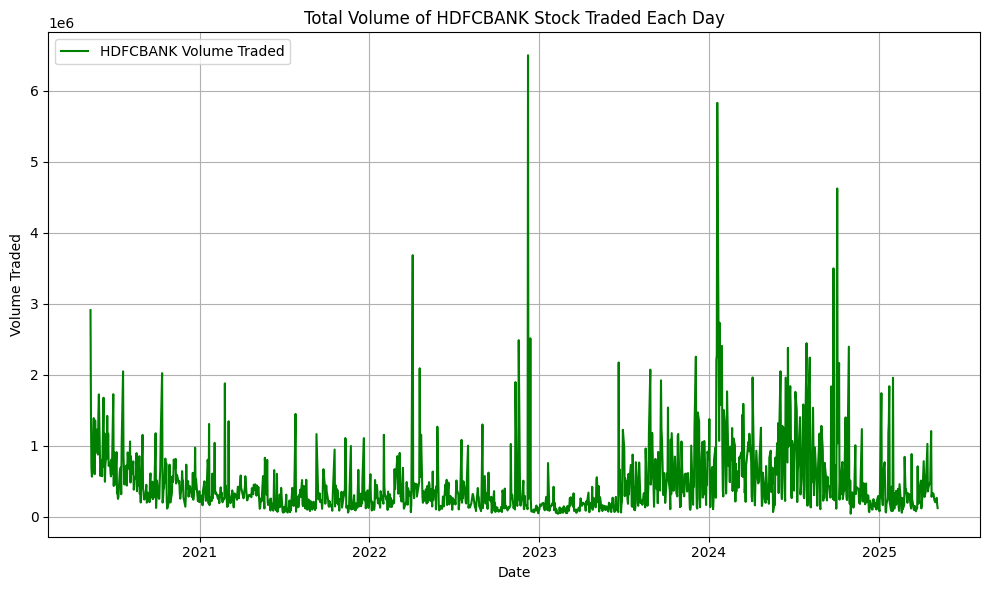

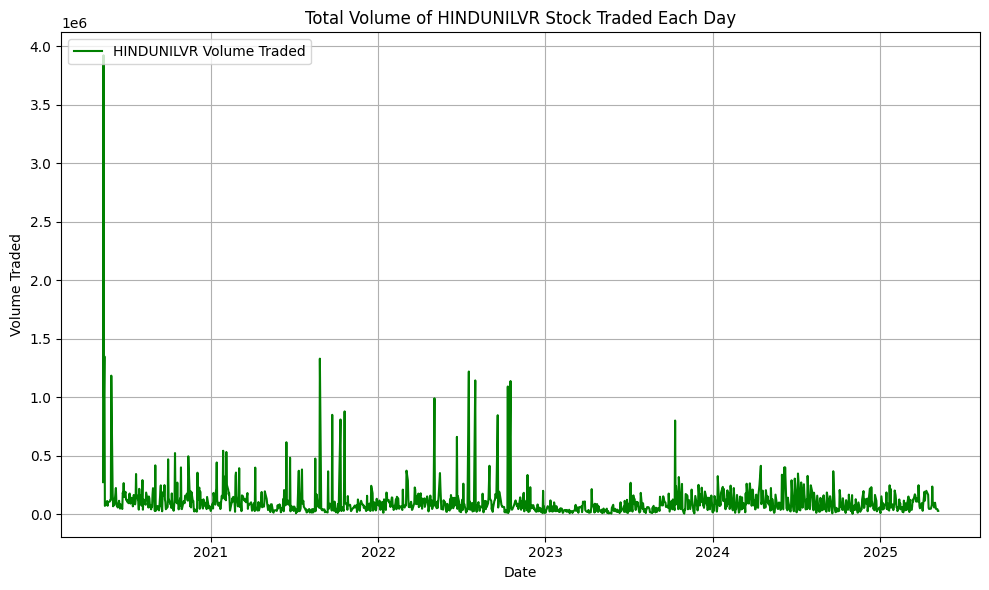

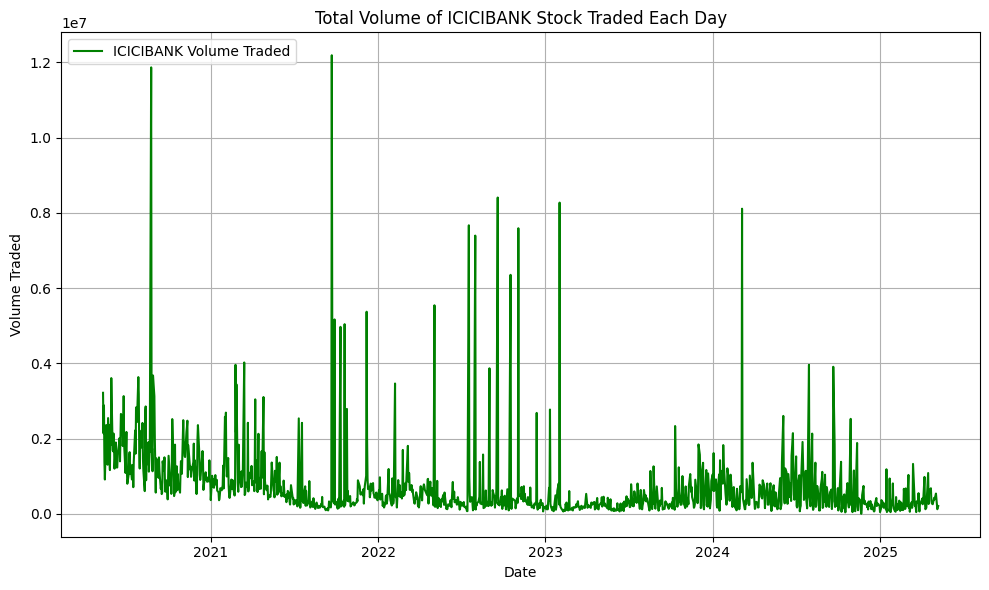

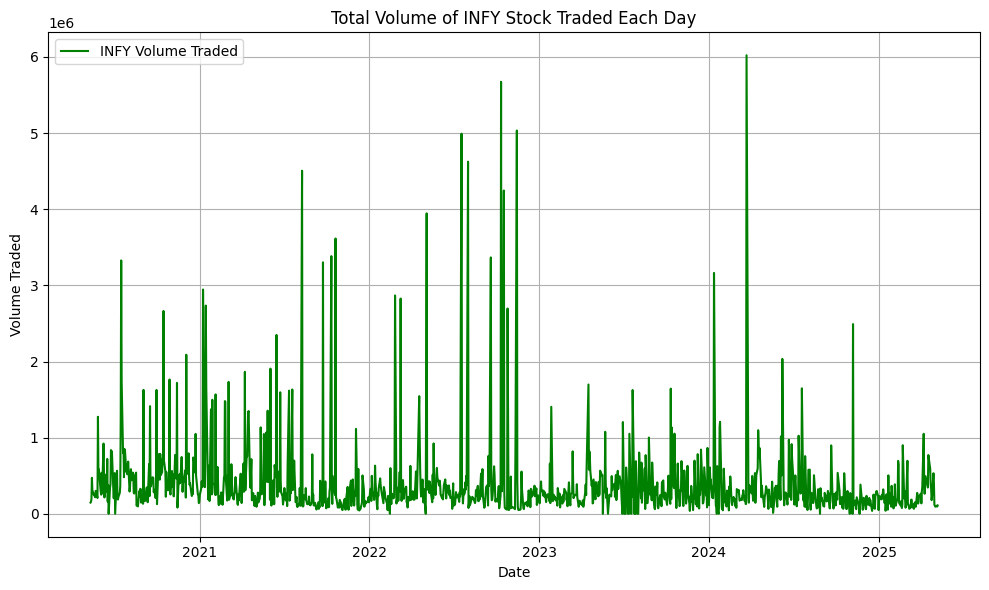

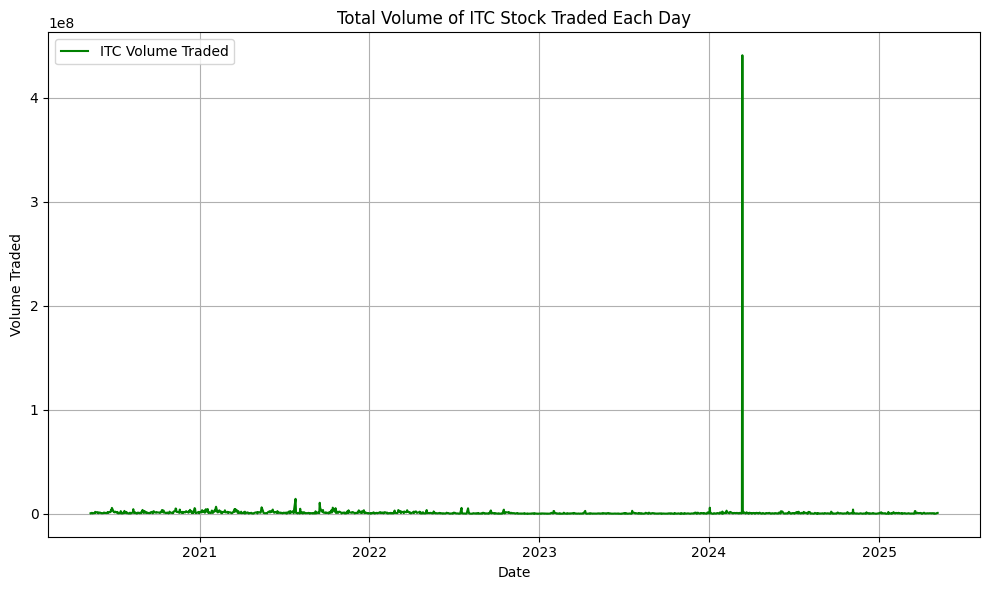

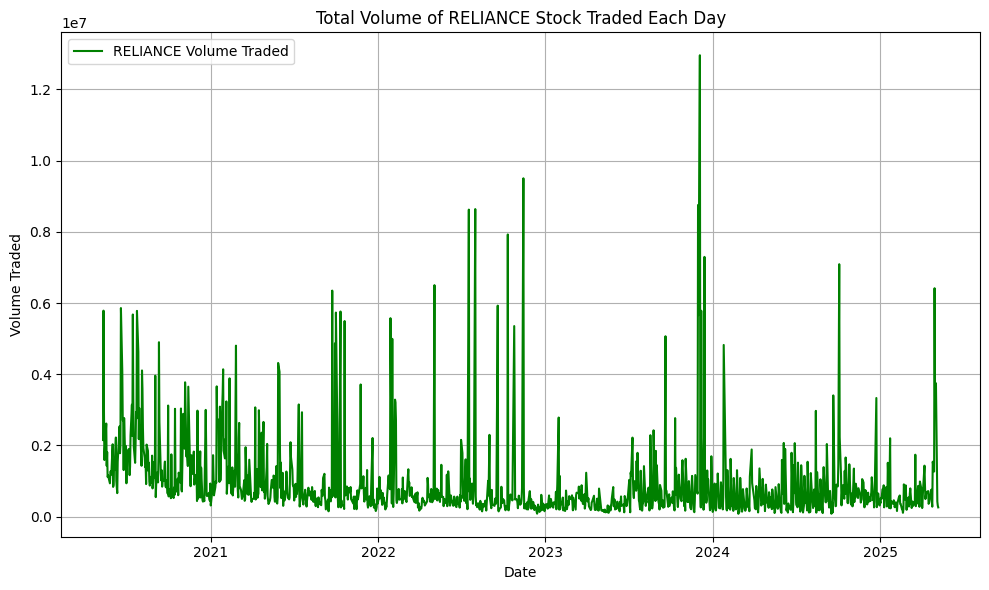

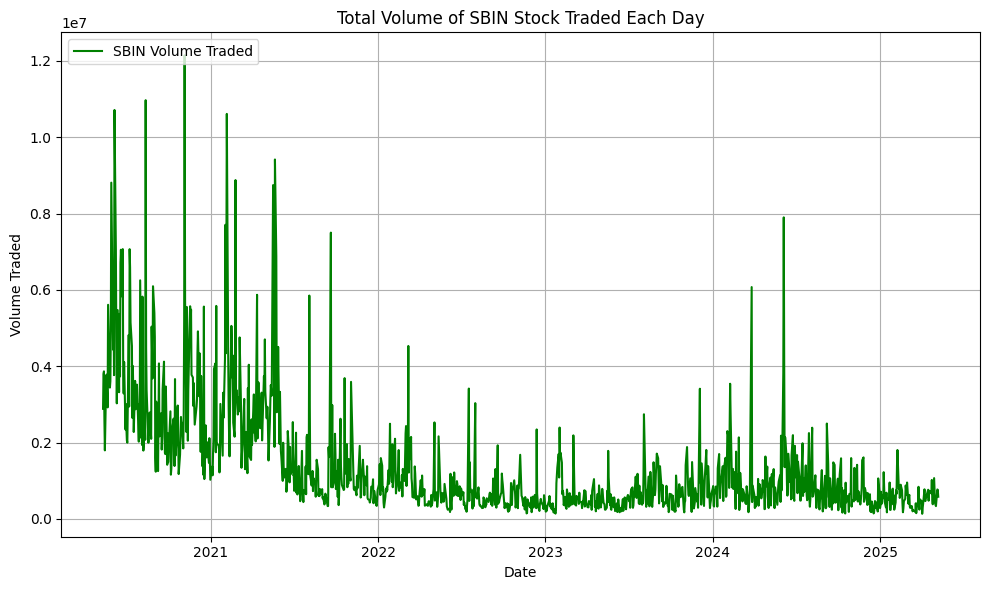

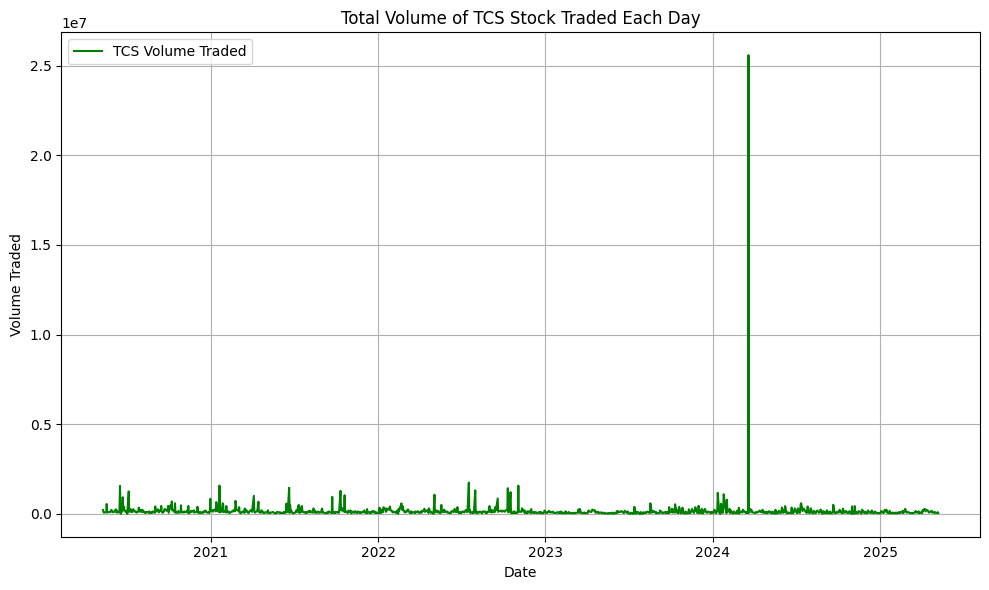

In [6]:
# Plot volume traded for each stock
for stock_name, df in stock_data.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df['timestamp'], df['volume'], color='green', linestyle='-', linewidth=1.5, label=f'{stock_name} Volume Traded')
    plt.title(f'Total Volume of {stock_name} Stock Traded Each Day')
    plt.xlabel('Date')
    plt.ylabel('Volume Traded')
    plt.grid(True)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

In [7]:
# List of moving average window sizes
MA_days = [10, 20, 50, 100]

In [8]:
# Calculate moving averages
for ma in MA_days:
    column_name = f'MA_{ma}_days'
    df[column_name] = df['close'].rolling(window=ma).mean()

    stock_data[stock_name] = df

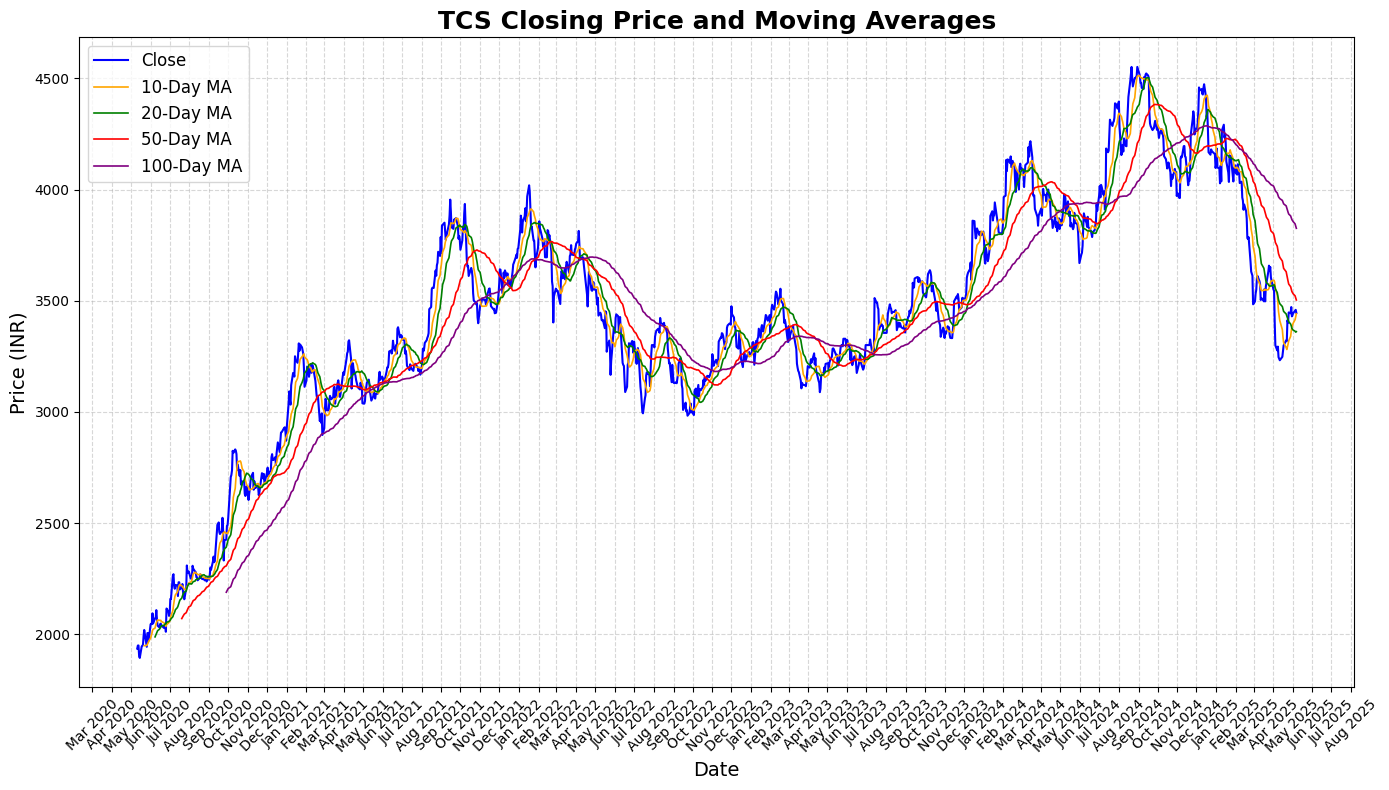

In [9]:
import matplotlib.dates as mdates
# Pick a stock to visualize
stock_name = 'TCS'
df = stock_data[stock_name].copy()

# Ensure date is datetime and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Plot with date-based x-axis
plt.figure(figsize=(14, 8))
plt.plot(df['close'], label='Close', color='blue', linewidth=1.5)
plt.plot(df['MA_10_days'], label='10-Day MA', color='orange', linewidth=1.2)
plt.plot(df['MA_20_days'], label='20-Day MA', color='green', linewidth=1.2)
plt.plot(df['MA_50_days'], label='50-Day MA', color='red', linewidth=1.2)
plt.plot(df['MA_100_days'], label='100-Day MA', color='purple', linewidth=1.2)

# Beautify the plot
plt.title(f'{stock_name} Closing Price and Moving Averages', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (INR)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=12)

# Format x-axis to show monthly ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


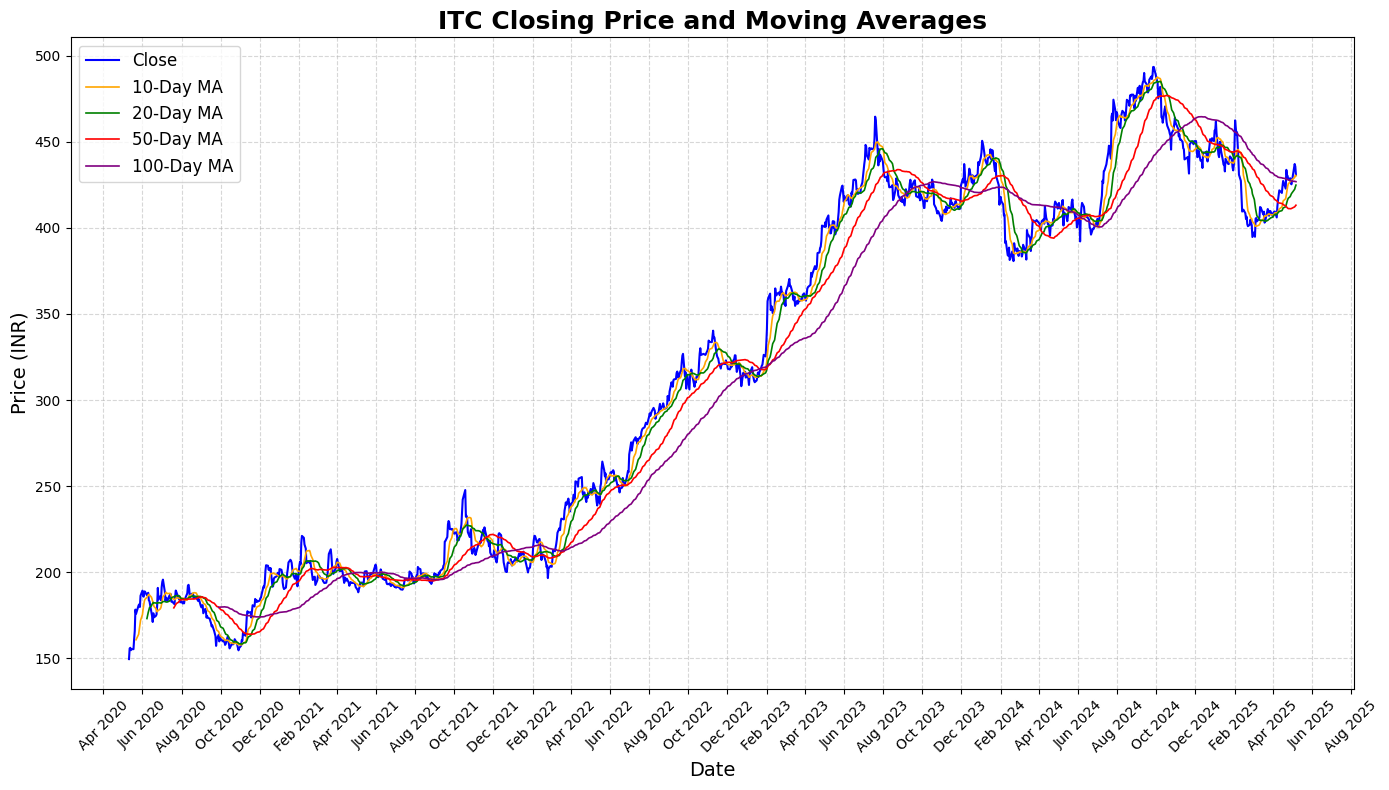

In [10]:
# Pick a stock to visualize
stock_name = 'ITC'
df = stock_data[stock_name].copy()

# Ensure timestamp is datetime and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Compute moving averages with clean column names
MA_days = [10, 20, 50, 100]
for ma in MA_days:
    df[f'MA_{ma}_days'] = df['close'].rolling(window=ma).mean()

# Plot
plt.figure(figsize=(14, 8))
plt.plot(df['close'], label='Close', color='blue', linewidth=1.5)
plt.plot(df['MA_10_days'], label='10-Day MA', color='orange', linewidth=1.2)
plt.plot(df['MA_20_days'], label='20-Day MA', color='green', linewidth=1.2)
plt.plot(df['MA_50_days'], label='50-Day MA', color='red', linewidth=1.2)
plt.plot(df['MA_100_days'], label='100-Day MA', color='purple', linewidth=1.2)

# Beautify the chart
plt.title(f'{stock_name} Closing Price and Moving Averages', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (INR)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=12)

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Every 2 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

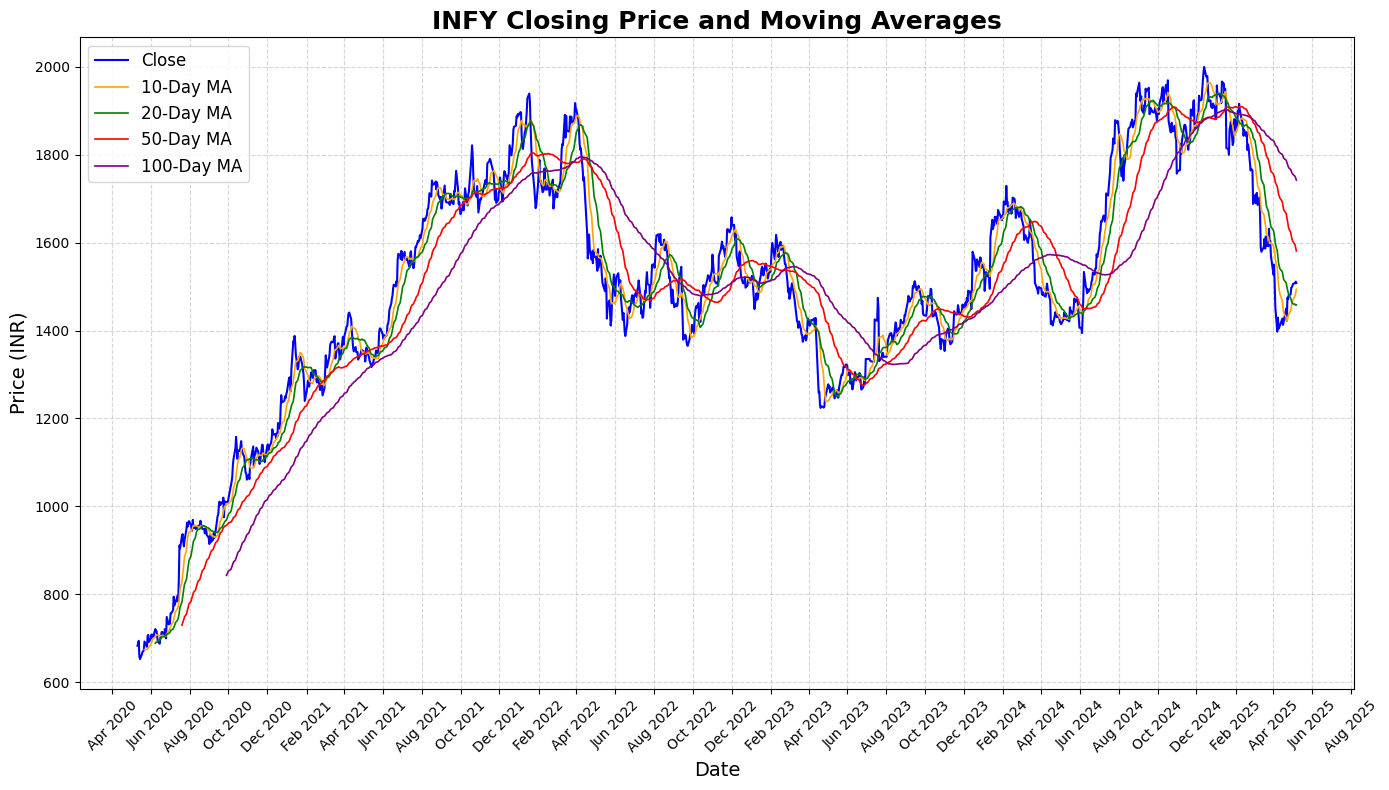

In [11]:
# Pick a stock to visualize
stock_name = 'INFY'
df = stock_data[stock_name].copy()

# Ensure timestamp is datetime and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Compute moving averages with clean column names
MA_days = [10, 20, 50, 100]
for ma in MA_days:
    df[f'MA_{ma}_days'] = df['close'].rolling(window=ma).mean()

# Plot
plt.figure(figsize=(14, 8))
plt.plot(df['close'], label='Close', color='blue', linewidth=1.5)
plt.plot(df['MA_10_days'], label='10-Day MA', color='orange', linewidth=1.2)
plt.plot(df['MA_20_days'], label='20-Day MA', color='green', linewidth=1.2)
plt.plot(df['MA_50_days'], label='50-Day MA', color='red', linewidth=1.2)
plt.plot(df['MA_100_days'], label='100-Day MA', color='purple', linewidth=1.2)

# Beautify the chart
plt.title(f'{stock_name} Closing Price and Moving Averages', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (INR)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=12)

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Every 2 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

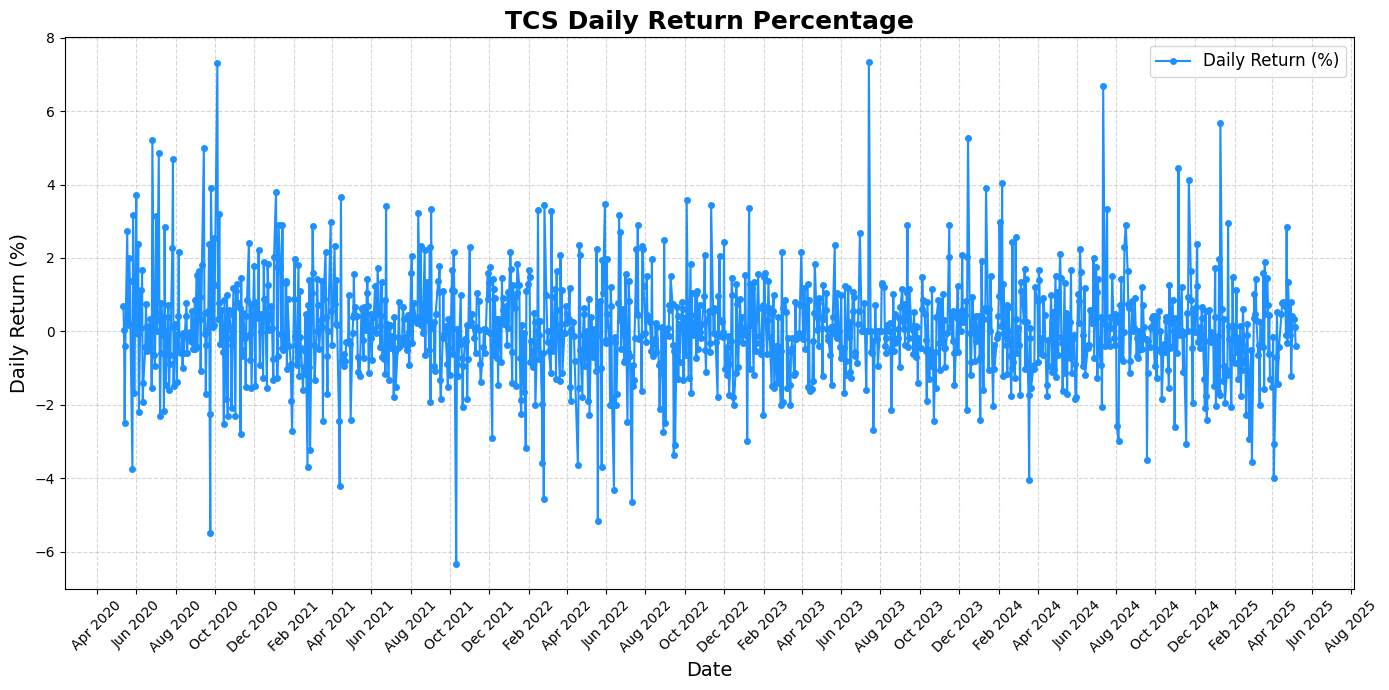

In [12]:
# Select stock (change 'TCS' to 'INFY', 'ITC', etc. as needed)
stock_name = 'TCS'
df = stock_data[stock_name].copy()

# Convert timestamp to datetime and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Calculate daily returns as percentage
df['Daily Return'] = df['close'].pct_change() * 100

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Daily Return'], 
         linestyle='-', color='dodgerblue', linewidth=1.5, marker='o', markersize=4, label='Daily Return (%)')

# Beautify the chart
plt.title(f'{stock_name} Daily Return Percentage', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily Return (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right', fontsize=12)

# Format x-axis ticks for dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Final layout adjustment
plt.tight_layout()
plt.show()


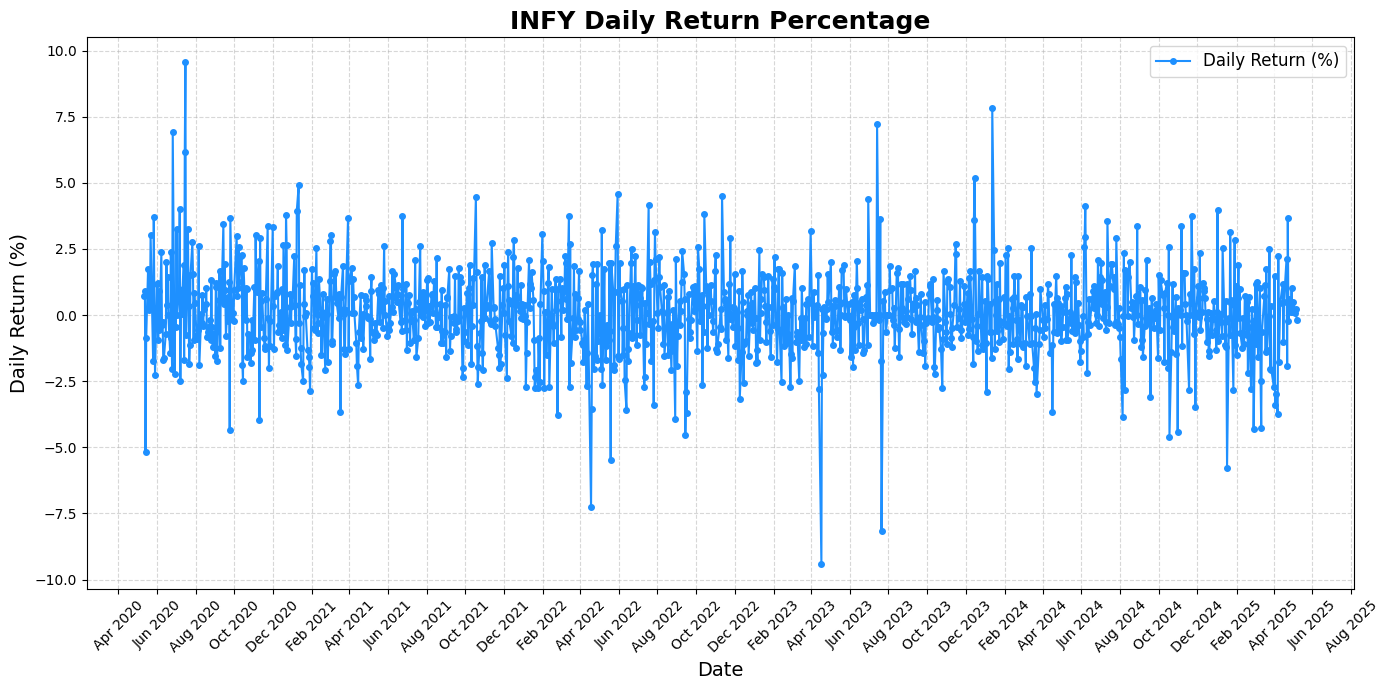

In [13]:
stock_name = 'INFY'
df = stock_data[stock_name].copy()

# Convert timestamp to datetime and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Calculate daily returns as percentage
df['Daily Return'] = df['close'].pct_change() * 100

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Daily Return'], 
         linestyle='-', color='dodgerblue', linewidth=1.5, marker='o', markersize=4, label='Daily Return (%)')

# Beautify the chart
plt.title(f'{stock_name} Daily Return Percentage', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily Return (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right', fontsize=12)

# Format x-axis ticks for dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Final layout adjustment
plt.tight_layout()
plt.show()


    timestamp     open       high        low      close  volume
0  2025-05-07  3449.95  3458.3501  3421.3000  3445.2000   40003
1  2025-05-06  3456.45  3473.8000  3435.9500  3458.9500   88329
2  2025-05-05  3445.05  3503.8000  3445.0500  3455.1499   47732
3  2025-05-02  3474.50  3491.8000  3421.1001  3443.8000   54402
4  2025-04-30  3471.50  3509.6001  3367.8501  3429.6499   52154


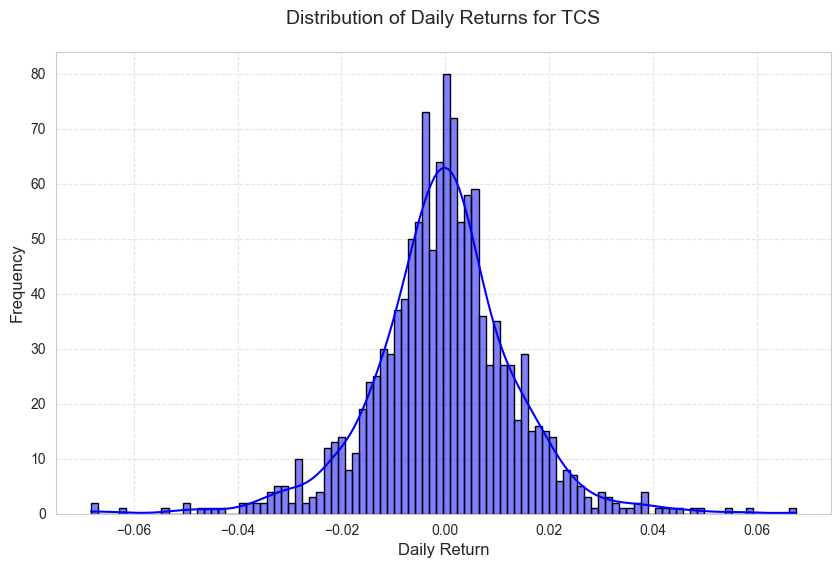

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set_style("whitegrid")

# Load the TCS stock data from the CSV file
tcs = pd.read_csv('stock_data/TCS.csv')

# Display the first few rows of the dataset to ensure it's loaded correctly
print(tcs.head())

# Assuming the data has a 'timestamp' column and 'close' column
# Convert 'timestamp' column to datetime (if not already in datetime format)
tcs['timestamp'] = pd.to_datetime(tcs['timestamp'])

# Set 'timestamp' as the index for easier manipulation
tcs.set_index('timestamp', inplace=True)

# Calculate daily returns
tcs['Daily Return'] = tcs['close'].pct_change()

# Create the distribution plot for TCS
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
sns.histplot(tcs['Daily Return'].dropna(), bins=100, color='blue', kde=True, edgecolor="k", linewidth=1)

# Set the plot axis labels
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add title
plt.title('Distribution of Daily Returns for TCS', fontsize=14, pad=20)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


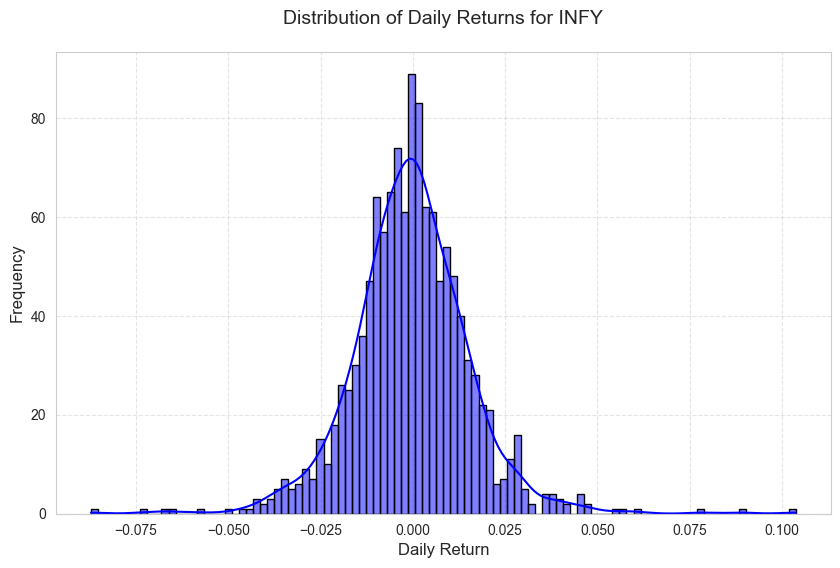

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set_style("whitegrid")

# Load the TCS stock data from the CSV file
infy = pd.read_csv('stock_data/INFY.csv')
# Assuming the data has a 'timestamp' column and 'close' column
# Convert 'timestamp' column to datetime (if not already in datetime format)
infy['timestamp'] = pd.to_datetime(infy['timestamp'])

# Set 'timestamp' as the index for easier manipulation
infy.set_index('timestamp', inplace=True)

# Calculate daily returns
infy['Daily Return'] = infy['close'].pct_change()

# Create the distribution plot for TCS
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
sns.histplot(infy['Daily Return'].dropna(), bins=100, color='blue', kde=True, edgecolor="k", linewidth=1)

# Set the plot axis labels
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add title
plt.title('Distribution of Daily Returns for INFY', fontsize=14, pad=20)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


    timestamp     open     high      low    close   volume
0  2025-05-07  1412.05  1424.90  1402.15  1406.00   262093
1  2025-05-06  1432.00  1432.00  1410.35  1420.55   311563
2  2025-05-05  1427.00  1439.75  1427.00  1431.10   428786
3  2025-05-02  1408.40  1426.00  1408.40  1421.95  3746656
4  2025-04-30  1404.90  1411.85  1373.50  1408.35  3375628


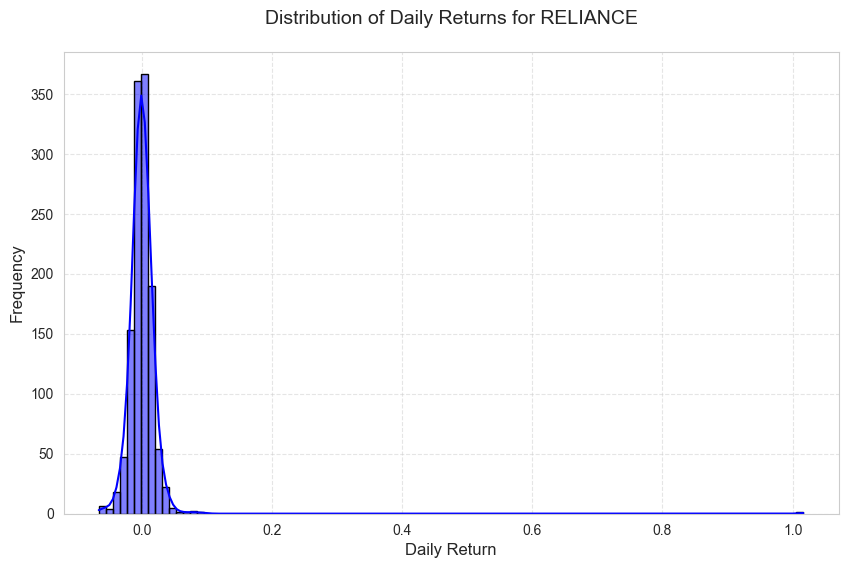

In [16]:
# Set the style for seaborn
sns.set_style("whitegrid")

# Load the TCS stock data from the CSV file
reliance = pd.read_csv('stock_data/RELIANCE.csv')

# Display the first few rows of the dataset to ensure it's loaded correctly
print(reliance.head())

# Assuming the data has a 'timestamp' column and 'close' column
# Convert 'timestamp' column to datetime (if not already in datetime format)
reliance['timestamp'] = pd.to_datetime(reliance['timestamp'])

# Set 'timestamp' as the index for easier manipulation
reliance.set_index('timestamp', inplace=True)

# Calculate daily returns
reliance['Daily Return'] = reliance['close'].pct_change()

# Create the distribution plot for TCS
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
sns.histplot(reliance['Daily Return'].dropna(), bins=100, color='blue', kde=True, edgecolor="k", linewidth=1)

# Set the plot axis labels
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add title
plt.title('Distribution of Daily Returns for RELIANCE', fontsize=14, pad=20)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


In [17]:
asianpaints = pd.read_csv('stock_data/ASIANPAINT.csv')
bhartiartl = pd.read_csv('stock_data/BHARTIARTL.csv')
hdfcbank = pd.read_csv('stock_data/HDFCBANK.csv')
hindunilvr = pd.read_csv('stock_data/HINDUNILVR.csv')
itc = pd.read_csv('stock_data/ITC.csv') 
sbin = pd.read_csv('stock_data/SBIN.csv')
iciciabank = pd.read_csv('stock_data/ICICIBANK.csv')
reliance = pd.read_csv('stock_data/RELIANCE.csv')
tcs = pd.read_csv('stock_data/TCS.csv')
infy = pd.read_csv('stock_data/INFY.csv')


In [18]:
tcs = pd.read_csv('stock_data/tcs.csv', parse_dates=['timestamp'])
tcs.sort_values('timestamp', inplace=True)
tcs.set_index('timestamp', inplace=True)

# 2. Compute Returns
# Simple daily returns
tcs['ret_simple'] = tcs['close'].pct_change()                              # :contentReference[oaicite:3]{index=3}
# Log returns for GBM
tcs['ret_log'] = np.log(tcs['close'] / tcs['close'].shift(1))
tcs.dropna(inplace=True)


<Axes: >

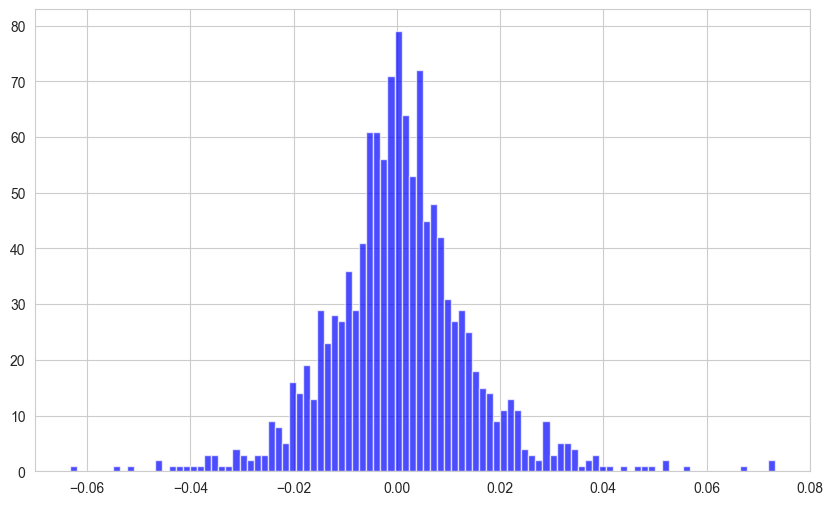

In [19]:
tcs['ret_simple'].hist(bins=100, figsize=(10, 6), color='blue', alpha=0.7)

In [20]:
import scipy.stats as st

# 1. Estimate parameters
mu = tcs['ret_log'].mean()
sigma = tcs['ret_log'].std()

# 2. Monte Carlo GBM paths
def simulate_gbm(S0, mu, sigma, T, steps, n_sims):
    dt = T/steps
    paths = np.zeros((steps+1, n_sims))
    paths[0] = S0
    for t in range(1, steps+1):
        z = np.random.standard_normal(n_sims)
        paths[t] = paths[t-1] * np.exp((mu - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*z)
    return paths

S0 = tcs['close'].iloc[-1]
paths = simulate_gbm(S0, mu, sigma, T=1/252, steps=1, n_sims=100000)  # 1‑day horizon :contentReference[oaicite:4]{index=4}

# 3. Compute returns and VaR
sim_returns = paths[-1]/S0 - 1
var_95 = -np.percentile(sim_returns, 5)
var_99 = -np.percentile(sim_returns, 1)
print(f"1 - day VaR 95%: {var_95:.4%}, VaR 99%: {var_99:.4%}")       # :contentReference[oaicite:5]{index=5}


1 - day VaR 95%: 0.1420%, VaR 99%: 0.2018%


1-Day VaR at 95%: -0.14% → ₹4.95
1-Day VaR at 99%: -0.20% → ₹6.99


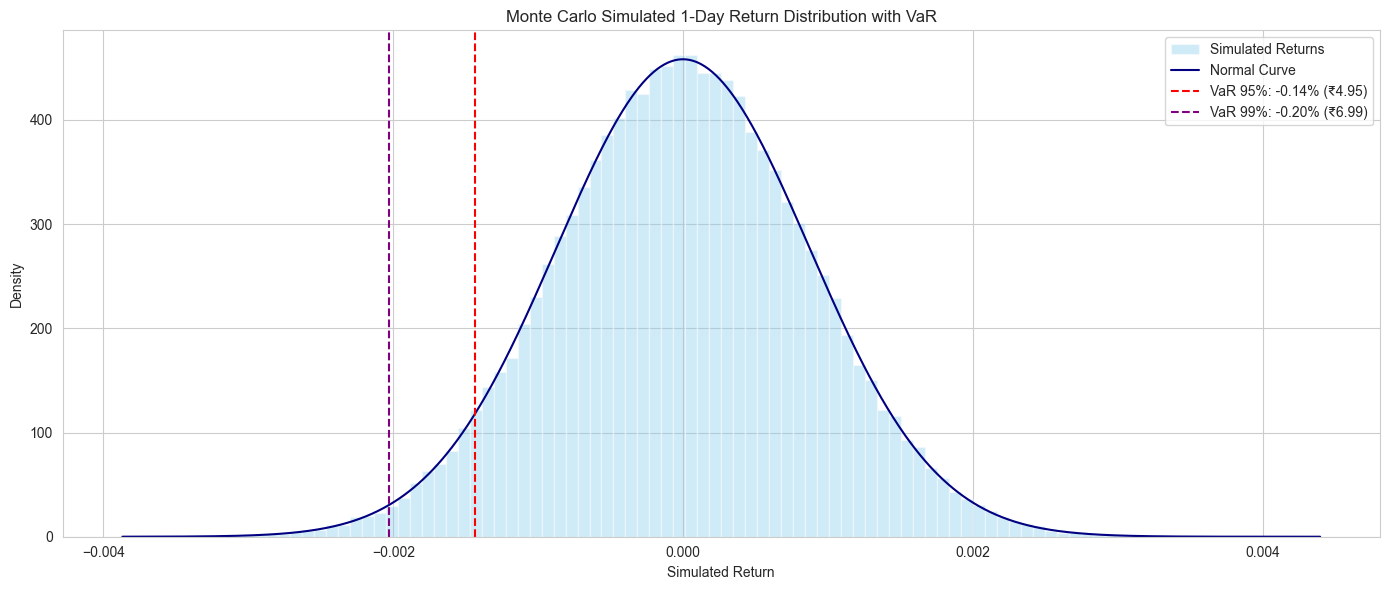

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# 0. Make sure 'ret_log' exists
tcs['ret_log'] = np.log(tcs['close'] / tcs['close'].shift(1))
tcs.dropna(inplace=True)

# 1. Estimate parameters
mu = tcs['ret_log'].mean()
sigma = tcs['ret_log'].std()

# 2. Monte Carlo GBM simulation function
def simulate_gbm(S0, mu, sigma, T, steps, n_sims):
    dt = T / steps
    paths = np.zeros((steps + 1, n_sims))
    paths[0] = S0
    for t in range(1, steps + 1):
        z = np.random.standard_normal(n_sims)
        paths[t] = paths[t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    return paths

# 3. Setup simulation parameters
S0 = tcs['close'].iloc[-1]  # Current price
paths = simulate_gbm(S0, mu, sigma, T=1/252, steps=1, n_sims=100000)  # 1-day horizon

# 4. Compute simulated returns
sim_returns = paths[-1] / S0 - 1

# 5. Compute VaR in percentage
var_95 = -np.percentile(sim_returns, 5)
var_99 = -np.percentile(sim_returns, 1)

# 6. Compute VaR in ₹ rupees for a portfolio
portfolio_value = S0  # Change this if your portfolio is worth more
var_95_value = var_95 * portfolio_value
var_99_value = var_99 * portfolio_value

# 7. Print results
print(f"1-Day VaR at 95%: {-var_95:.2%} → ₹{var_95_value:,.2f}")
print(f"1-Day VaR at 99%: {-var_99:.2%} → ₹{var_99_value:,.2f}")

# 8. Plot histogram with normal curve and VaR lines
plt.figure(figsize=(14, 6))
count, bins, _ = plt.hist(sim_returns, bins=100, density=True, alpha=0.4, color='skyblue', label='Simulated Returns')

# Plot normal distribution curve
x = np.linspace(min(sim_returns), max(sim_returns), 1000)
pdf = norm.pdf(x, np.mean(sim_returns), np.std(sim_returns))
plt.plot(x, pdf, 'navy', label='Normal Curve')

# Plot VaR lines
plt.axvline(-var_95, color='red', linestyle='--', label=f'VaR 95%: {-var_95:.2%} (₹{var_95_value:.2f})')
plt.axvline(-var_99, color='purple', linestyle='--', label=f'VaR 99%: {-var_99:.2%} (₹{var_99_value:.2f})')

# Final touches
plt.title('Monte Carlo Simulated 1-Day Return Distribution with VaR')
plt.xlabel('Simulated Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



ADF Statistic: -2.7421763123501472
p-value: 0.0670199270419421
Series is non-stationary. Differencing will be applied.
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13046.273, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13047.915, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13047.903, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13045.109, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13047.868, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.317 seconds


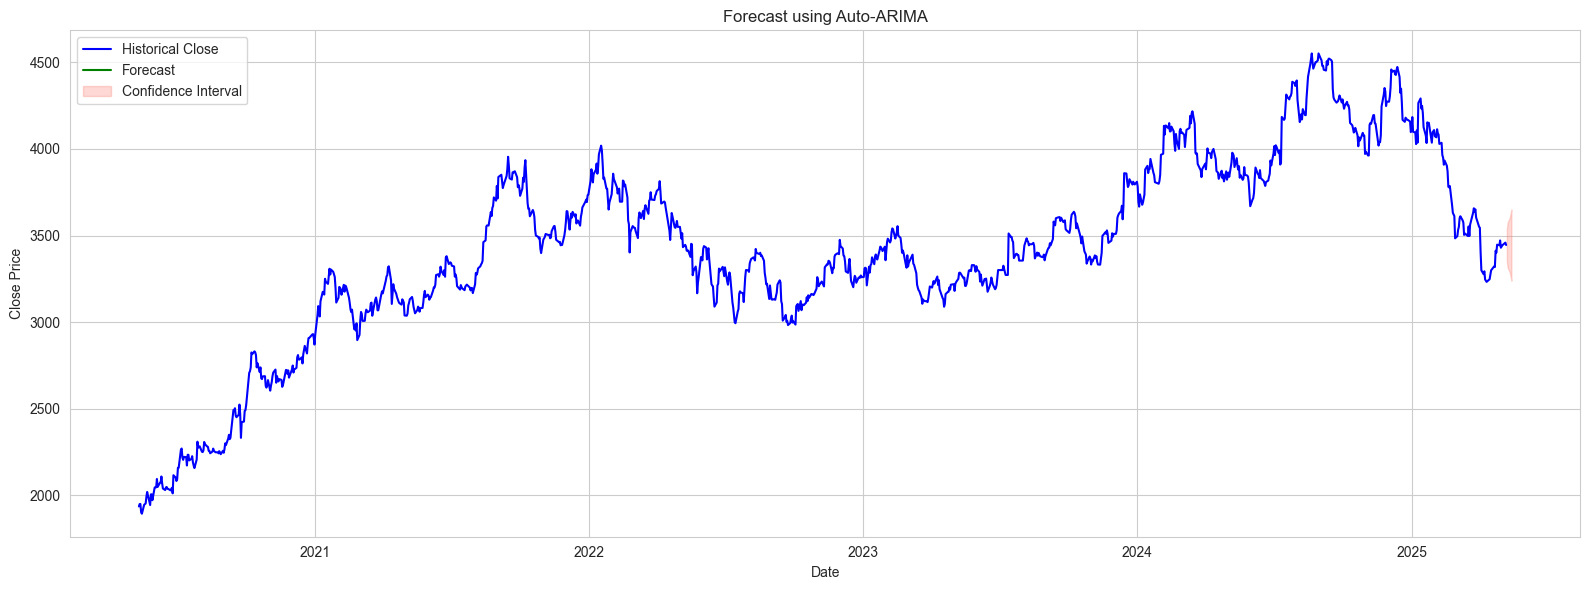

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load and clean data
tcs = pd.read_csv("stock_data/TCS.csv", parse_dates=['timestamp'], index_col='timestamp')
tcs = tcs.sort_index()
tcs = tcs.dropna(subset=['close'])

# Stationarity check (ADF Test)
result = adfuller(tcs['close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] > 0.05:
    print("Series is non-stationary. Differencing will be applied.")
else:
    print("Series is stationary.")

# Fit Auto-ARIMA
arima_model = pm.auto_arima(
    tcs['close'],
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    d=None,  # let auto_arima decide differencing
    seasonal=False,
    stepwise=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

# Forecast
n_forecast = 5
fc, conf_int = arima_model.predict(n_periods=n_forecast, return_conf_int=True)
forecast_index = pd.date_range(tcs.index[-1] + pd.Timedelta(days=1), periods=n_forecast, freq='B')
fc_series = pd.Series(fc, index=forecast_index)

# Plot
plt.figure(figsize=(16, 6))
plt.plot(tcs['close'], label="Historical Close", color='blue')
plt.plot(fc_series, label="Forecast", color='green')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='salmon', alpha=0.3, label="Confidence Interval")
plt.title("Forecast using Auto-ARIMA")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
